<a href="https://colab.research.google.com/github/GitSantiagopf/RoadAccidentsIN/blob/main/Road_accidents_india.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Total number of road accidents in india
**EDA, linear regression and svm**


In an ever-evolving landscape of transportation and safety, understanding the dynamics of road accidents is paramount. This project delves into a comprehensive dataset sourced from the Transport Research Wing (TRW) of the Ministry of Road Transport & Highways in India. The dataset encompasses a wide array of information, ranging from the total number of road accidents to the number of persons killed and injured. Additionally, it provides insights into various accident metrics, such as the number of accidents per population, vehicles, and road length.

The dataset's significance lies not only in its scope but also in its role as part of the Asia Pacific Road Accidents Data (APRAD) and Indian Road Accident Data (IRAD) initiatives, spearheaded by the United Nations Economic and Social Commission for the Asia & the Pacific (UNESCAP). The meticulous collection process, facilitated through designated nodal officers across states, union territories, and million-plus cities in India, ensures its reliability and relevance.

In this study, we embark on an exploratory journey through this rich dataset, aiming to uncover patterns, trends, and insights hidden within the numbers. Through Exploratory Data Analysis (EDA), we will visualize the data's characteristics and distributions, enabling us to grasp the dynamics of road accidents and their aftermath in India. Furthermore, we will harness the power of machine learning to build predictive models that can provide valuable insights for accident prevention and mitigation strategies.

In [74]:
#Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import mean_squared_log_error
from sklearn.svm import SVR

In [75]:
#Mount our drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [76]:
#Download data from our drive
df = pd.read_csv('/content/drive/MyDrive/Data science projects/Road accidents india/Data/data.csv')
df.head()

,States/UTs,State/UT-Wise Total Number of Road Accidents during 2016,State/UT-Wise Total Number of Road Accidents during 2017,State/UT-Wise Total Number of Road Accidents during 2018,State/UT-Wise Total Number of Road Accidents during 2019 - Numbers,State/UT-Wise Total Number of Road Accidents during 2019 - Rank,Share of States/UTs in Total Number of Road Accidents - 2016,Share of States/UTs in Total Number of Road Accidents - 2017,Share of States/UTs in Total Number of Road Accidents - 2018,Share of States/UTs in Total Number of Road Accidents - 2019,...,Total Number of Accidents Per Lakh Population - 2017,Total Number of Accidents Per Lakh Population - 2018,Total Number of Accidents Per Lakh Population - 2019,"Total Number of Road Accidents per 10,000 Vehicles - 2016","Total Number of Road Accidents per 10,000 Vehicles - 2017","Total Number of Road Accidents per 10,000 Vehicles - 2018","Total Number of Road Accidents per 10,000 Vehicles - 2019","Total Number of Road Accidents per 10,000 Km of Roads - 2016","Total Number of Road Accidents per 10,000 Km of Roads - 2017","Total Number of Road Accidents per 10,000 Km of Roads - 2018(P)"
0,Andhra Pradesh,24888,25727,24475,21992,8.0,5.177967,5.533759,5.240406,4.897974,...,28.895378,27.288134,24.346286,28.516568,26.725547,22.670402,18.337660,1427.335496,1457.837875,1121.728769
1,Arunachal Pradesh,249,241,277,237,30.0,0.051805,0.051838,0.059309,0.052784,...,18.161266,20.656227,17.503693,9.404993,13.398640,13.198458,10.297364,81.127821,65.090471,54.791811
2,Assam,7435,7170,8248,8350,16.0,1.546857,1.542234,1.766001,1.859680,...,21.853094,24.868842,24.913474,26.389673,23.673797,23.962833,21.211645,225.631221,212.269937,240.040278
3,Bihar,8222,8855,9600,10007,15.0,1.710593,1.904670,2.055481,2.228721,...,8.428196,9.040229,9.326797,14.997276,14.177194,13.036354,11.699738,398.190717,422.574655,330.383968
4,Chhattisgarh,13580,13563,13864,13899,11.0,2.825329,2.917339,2.968457,3.095532,...,51.794852,52.340683,51.896796,28.230195,25.873554,23.930833,21.801443,1417.399085,1386.178169,1351.556864


In [77]:
#Information for variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 21 columns):
 #   Column                                                              Non-Null Count  Dtype  
---  ------                                                              --------------  -----  
 0   States/UTs                                                          37 non-null     object 
 1   State/UT-Wise Total Number of Road Accidents during 2016            37 non-null     int64  
 2   State/UT-Wise Total Number of Road Accidents during 2017            37 non-null     int64  
 3   State/UT-Wise Total Number of Road Accidents during 2018            37 non-null     int64  
 4   State/UT-Wise Total Number of Road Accidents during 2019 - Numbers  37 non-null     int64  
 5   State/UT-Wise Total Number of Road Accidents during 2019 - Rank     36 non-null     float64
 6   Share of States/UTs in Total Number of Road Accidents - 2016        37 non-null     float64
 7   Share of States/UTs

we have a 1 missing value

In [78]:
#General describe for variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
State/UT-Wise Total Number of Road Accidents during 2016,37.0,25981.189189,78796.721607,1.000000,538.000000,6952.000000,22811.000000,480652.000000
State/UT-Wise Total Number of Road Accidents during 2017,37.0,25130.270270,76174.595892,1.000000,531.000000,6273.000000,22112.000000,464910.000000
State/UT-Wise Total Number of Road Accidents during 2018,37.0,25245.621622,76481.808322,3.000000,430.000000,6428.000000,21743.000000,467044.000000
State/UT-Wise Total Number of Road Accidents during 2019 - Numbers,37.0,24270.378378,73512.475713,1.000000,482.000000,5796.000000,21570.000000,449002.000000
State/UT-Wise Total Number of Road Accidents during 2019 - Rank,36.0,18.500000,10.535654,1.000000,9.750000,18.500000,27.250000,36.000000
Share of States/UTs in Total Number of Road Accidents - 2016,37.0,5.405405,16.393716,0.000208,0.111931,1.446369,4.745845,100.000000
Share of States/UTs in Total Number of Road Accidents - 2017,37.0,5.405405,16.384805,0.000215,0.114216,1.349293,4.756189,100.000000
Share of States/UTs in Total Number of Road Accidents - 2018,37.0,5.405405,16.375718,0.000642,0.092068,1.376316,4.655450,100.000000
Share of States/UTs in Total Number of Road Accidents - 2019,37.0,5.405405,16.372416,0.000223,0.107349,1.290863,4.803988,100.000000
Total Number of Accidents Per Lakh Population - 2016,36.0,39.629216,40.830731,1.234568,16.523055,26.479850,43.469402,217.703591


In [79]:
#Copy the principal dataframe and no modified the original data
dfpro = df.copy()

#Delete missing values
dfpro = dfpro.dropna()

In [81]:
#Correlation matrix
correlation_matrix = dfpro.corr()

<ipython-input-81-8060f1612475>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = dfpro.corr()


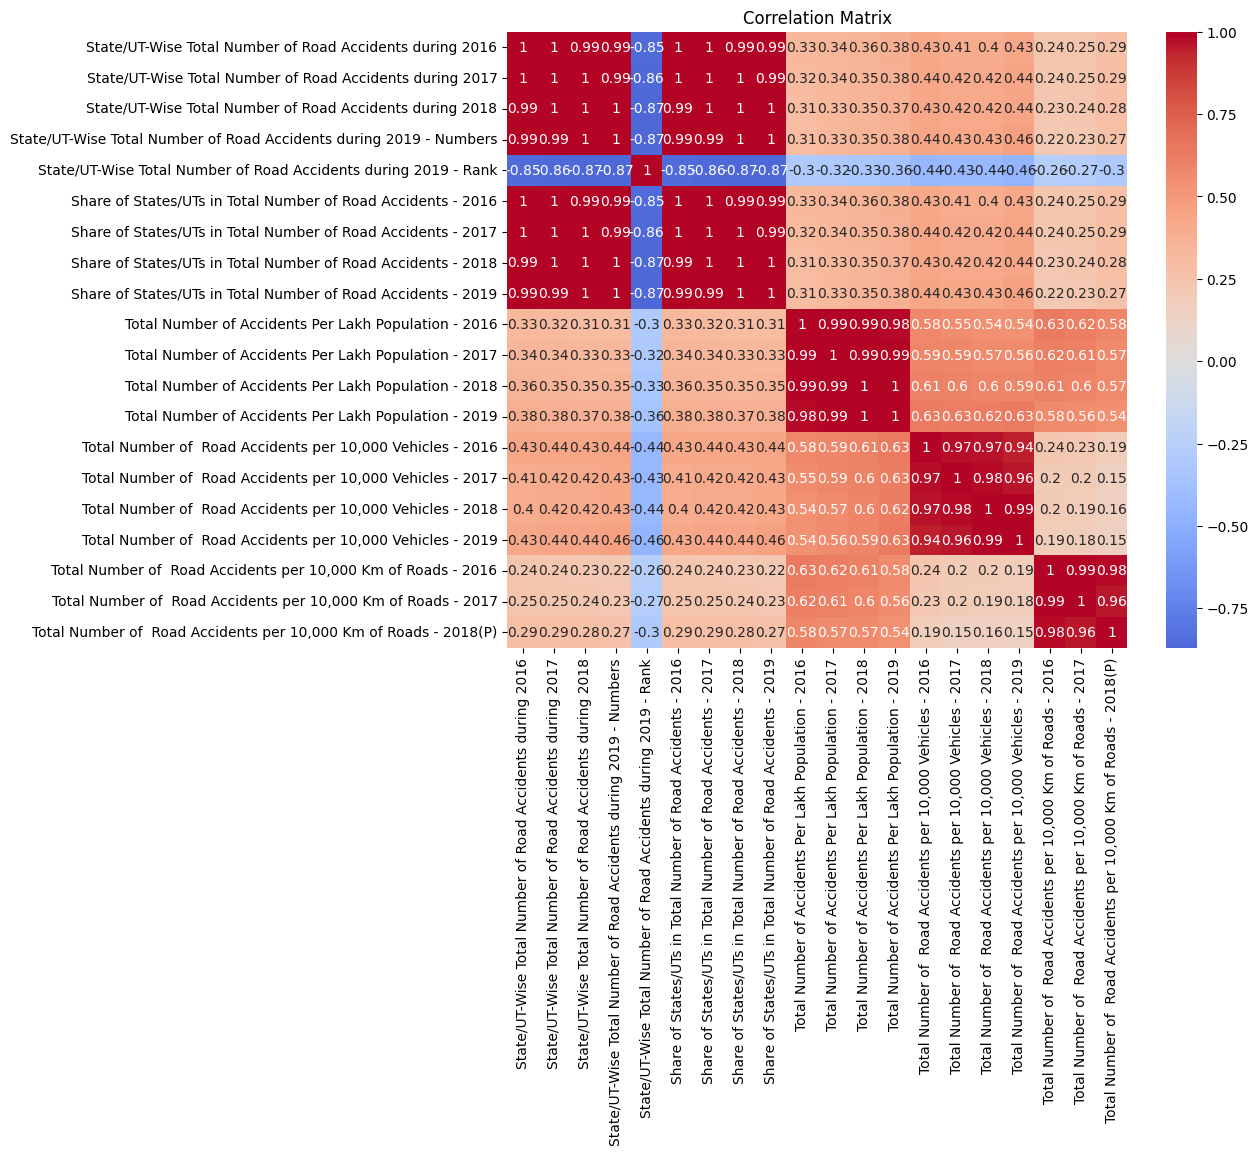

In [82]:
#Show the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

In [83]:
data = dfpro[['States/UTs', 'State/UT-Wise Total Number of Road Accidents during 2016',
           'State/UT-Wise Total Number of Road Accidents during 2017',
           'State/UT-Wise Total Number of Road Accidents during 2018',
           'State/UT-Wise Total Number of Road Accidents during 2019 - Numbers']]

data.columns = ['State', '2016', '2017', '2018', '2019']

data.head()

,State,2016,2017,2018,2019
0,Andhra Pradesh,24888,25727,24475,21992
1,Arunachal Pradesh,249,241,277,237
2,Assam,7435,7170,8248,8350
3,Bihar,8222,8855,9600,10007
4,Chhattisgarh,13580,13563,13864,13899


In [84]:
melted_df = data.melt(id_vars='State', var_name='Year', value_name='Count')

melted_df = melted_df.sort_values(by=['Year', 'Count'], ascending=False)

top_states_per_year = melted_df.groupby('Year').head(5)

top_states_per_year

,State,Year,Count
125,Tamil Nadu,2019,57228
115,Madhya Pradesh,2019,50669
128,Uttar Pradesh,2019,42572
114,Kerala,2019,41111
113,Karnataka,2019,40658
91,Tamil Nadu,2018,63920
81,Madhya Pradesh,2018,51397
94,Uttar Pradesh,2018,42568
79,Karnataka,2018,41707
80,Kerala,2018,40181


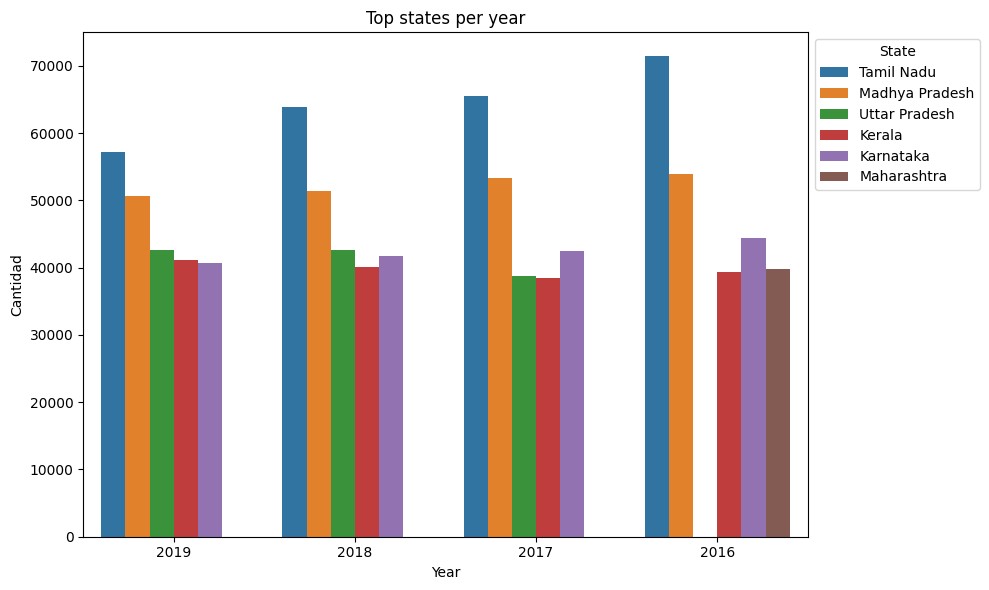

In [85]:
plt.figure(figsize=(10, 6))
sns.barplot(data=top_states_per_year, x='Year', y='Count', hue='State')
plt.xlabel('Year')
plt.ylabel('Cantidad')
plt.title('Top states per year')
plt.legend(title='State', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

In [86]:
melted_df = melted_df.sort_values(by=['Year', 'Count'], ascending = True)
bottom_states_per_year = melted_df.groupby('Year').head(5)

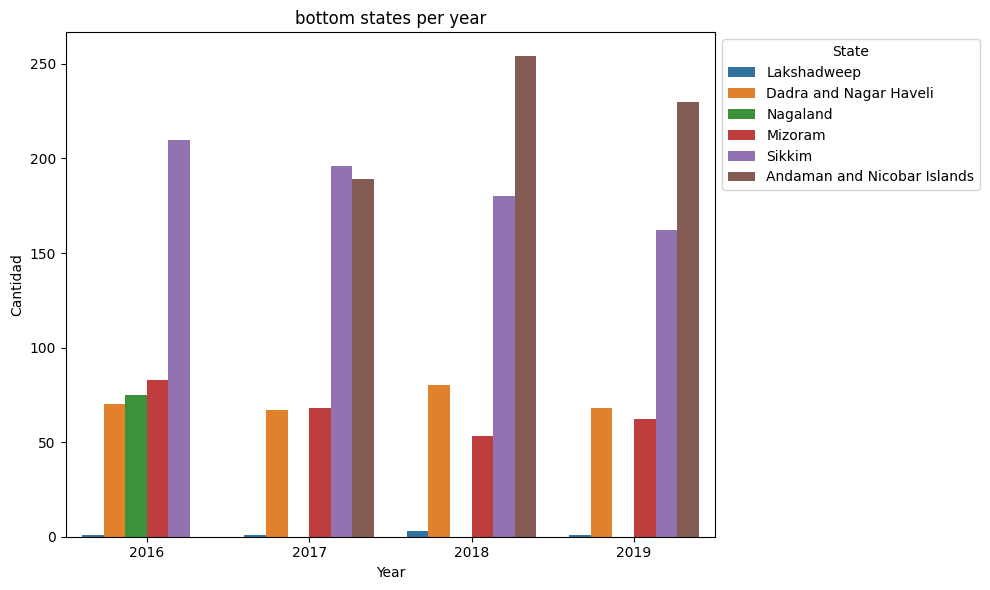

In [87]:
plt.figure(figsize=(10, 6))
sns.barplot(data=bottom_states_per_year, x='Year', y='Count', hue='State')
plt.xlabel('Year')
plt.ylabel('Cantidad')
plt.title('bottom states per year')
plt.legend(title='State', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

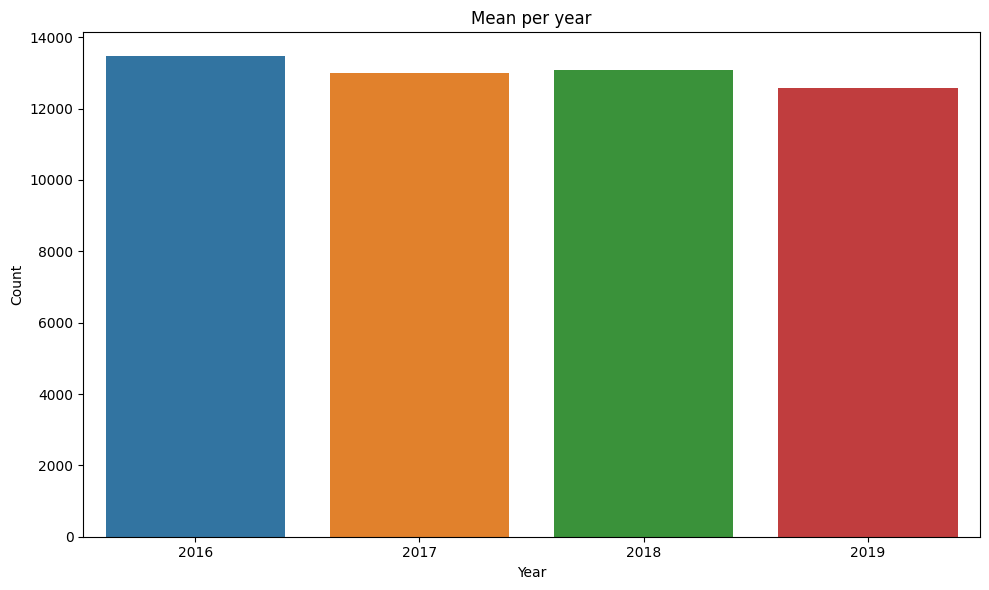

In [88]:
average_per_year = data.drop('State', axis=1).mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=average_per_year.index, y=average_per_year.values)
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Mean per year')
plt.tight_layout()
plt.show()

In [89]:
dfpro

,States/UTs,State/UT-Wise Total Number of Road Accidents during 2016,State/UT-Wise Total Number of Road Accidents during 2017,State/UT-Wise Total Number of Road Accidents during 2018,State/UT-Wise Total Number of Road Accidents during 2019 - Numbers,State/UT-Wise Total Number of Road Accidents during 2019 - Rank,Share of States/UTs in Total Number of Road Accidents - 2016,Share of States/UTs in Total Number of Road Accidents - 2017,Share of States/UTs in Total Number of Road Accidents - 2018,Share of States/UTs in Total Number of Road Accidents - 2019,...,Total Number of Accidents Per Lakh Population - 2017,Total Number of Accidents Per Lakh Population - 2018,Total Number of Accidents Per Lakh Population - 2019,"Total Number of Road Accidents per 10,000 Vehicles - 2016","Total Number of Road Accidents per 10,000 Vehicles - 2017","Total Number of Road Accidents per 10,000 Vehicles - 2018","Total Number of Road Accidents per 10,000 Vehicles - 2019","Total Number of Road Accidents per 10,000 Km of Roads - 2016","Total Number of Road Accidents per 10,000 Km of Roads - 2017","Total Number of Road Accidents per 10,000 Km of Roads - 2018(P)"
0,Andhra Pradesh,24888,25727,24475,21992,8.0,5.177967,5.533759,5.240406,4.897974,...,28.895378,27.288134,24.346286,28.516568,26.725547,22.670402,18.337660,1427.335496,1457.837875,1121.728769
1,Arunachal Pradesh,249,241,277,237,30.0,0.051805,0.051838,0.059309,0.052784,...,18.161266,20.656227,17.503693,9.404993,13.398640,13.198458,10.297364,81.127821,65.090471,54.791811
2,Assam,7435,7170,8248,8350,16.0,1.546857,1.542234,1.766001,1.859680,...,21.853094,24.868842,24.913474,26.389673,23.673797,23.962833,21.211645,225.631221,212.269937,240.040278
3,Bihar,8222,8855,9600,10007,15.0,1.710593,1.904670,2.055481,2.228721,...,8.428196,9.040229,9.326797,14.997276,14.177194,13.036354,11.699738,398.190717,422.574655,330.383968
4,Chhattisgarh,13580,13563,13864,13899,11.0,2.825329,2.917339,2.968457,3.095532,...,51.794852,52.340683,51.896796,28.230195,25.873554,23.930833,21.801443,1417.399085,1386.178169,1351.556864
5,Goa,4304,3917,3709,3440,21.0,0.895450,0.842529,0.794144,0.766144,...,193.623332,179.352031,162.494095,37.159797,31.623291,27.983118,24.535484,2679.436322,2351.275718,1993.335841
6,Gujarat,21859,19081,18769,17046,10.0,4.547781,4.104235,4.018679,3.796420,...,30.033684,29.225188,26.268666,10.735564,8.658801,7.879243,6.763994,1220.192327,1054.626502,930.346680
7,Haryana,11234,11258,11238,10944,13.0,2.337242,2.421544,2.406197,2.437406,...,40.397589,39.776307,38.224302,13.012924,12.014484,14.532519,12.726073,2317.142419,1383.286294,2246.656404
8,Himachal Pradesh,3168,3114,3110,2873,22.0,0.659105,0.669807,0.665890,0.639864,...,43.546357,43.158479,39.578454,26.950005,22.967786,20.804666,17.573725,568.162050,495.764035,502.431380
9,Jammu and Kashmir,5501,5624,5978,5796,18.0,1.144487,1.209696,1.279965,1.290863,...,44.830610,47.200947,45.352113,40.284076,37.224202,35.707289,31.268224,1106.474819,887.267211,550.070392


Model for 2016

In [91]:
X1 = dfpro.drop(['State/UT-Wise Total Number of Road Accidents during 2016', 'States/UTs'], axis=1)
y1 = dfpro['State/UT-Wise Total Number of Road Accidents during 2016']

In [92]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.2, random_state = 42)

# Initialize and train the linear regression model
model1 = LinearRegression()
model1.fit(X1_train, y1_train)

# Make predictions on the test set
y1_pred = model1.predict(X1_test)

# Calculate R-squared
r2 = r2_score(y1_test, y1_pred)

print(f"R-squared: {r2:.2f}")

R-squared: 1.00


In [97]:
model2 = SVR(kernel='linear')
model2.fit(X1_train, y1_train)

# Make predictions on the test set
y_pred = model2.predict(X1_test)

# Calculate R-squared
r2 = r2_score(y1_test, y1_pred)

print(f"R-squared: {r2:.2f}")

R-squared: 1.00


In [93]:
X = dfpro.drop(['State/UT-Wise Total Number of Road Accidents during 2019 - Numbers', 'States/UTs'], axis=1)
y = dfpro['State/UT-Wise Total Number of Road Accidents during 2019 - Numbers']

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state = 42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)

print(f"R-squared: {r2:.2f}")

R-squared: 1.00


In [95]:
model2 = SVR(kernel='linear')
model2.fit(X_train, y_train)

y_pred = model2.predict(X_test)

r2 = r2_score(y_test, y_pred)

print(f"R-squared: {r2:.2f}")

R-squared: 0.99
